In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

In [5]:
import pathlib
import fem

project_path = pathlib.Path(fem.__file__).parents[1]
sim_path = project_path / 'sims/load_0/material_0'
force_file = sim_path / 'secforc'

found_nodal_line = 0
nodal_idx = 0
with open(force_file, 'r') as ff:
    for idx, line in enumerate(ff):
        print(f"{idx}: {line}")
        if '99' in line:
            print(line)
            
        

0:                                                                          

1:                          ls-dyna mpp.123264 d           date 01/12/2018

2: 

3: {BEGIN LEGEND}

4:  Entity #        Title

5:        99                                                                                     

       99                                                                                     



In [35]:
def parse_text_file(filename, n):
    results = []
    with open(filename, 'r') as file:
        # Skip the first n lines
        for _ in range(n):
            next(file)

        # Read the rest of the file
        remaining_text = file.read()

        # Split the text by '\n\n' and append the blocks to the list
        split_blocks = remaining_text.split('\n\n')

        for block in split_blocks:
            block_vals = block.split()  # convert all whitespace to space and split on spaces
            if len(block_vals) == 16:
                results.append( dict(
                    t = float(block_vals[1]),
                    x_force = float(block_vals[2]),
                    y_force = float(block_vals[3]),
                    z_force = float(block_vals[4]),
                    mag_force = float(block_vals[5]),
                    x_moment = float(block_vals[8]),
                    y_moment = float(block_vals[9]),
                    z_moment = float(block_vals[10]),
                    mag_moment = float(block_vals[11]),
                    x_centroid = float(block_vals[12]),
                    y_centroid = float(block_vals[13]),
                    z_centroid = float(block_vals[14]),
                    area = float(block_vals[15]),
                ) )


    return results

# Example usage:
project_path = pathlib.Path(fem.__file__).parents[1]
sim_path = project_path / 'sims/load_0/material_0'
filename = sim_path / 'secforc'
n = 13  # Replace with the number of lines to skip
result = parse_text_file(filename, n)
print(result[0])


{'t': 1.1897e-07, 'x_force': 0.0, 'y_force': 0.0, 'z_force': 0.0, 'mag_force': 0.0, 'x_moment': 0.0, 'y_moment': 0.0, 'z_moment': 0.0, 'mag_moment': 0.0, 'x_centroid': 0.0, 'y_centroid': 0.0, 'z_centroid': 0.0, 'area': 0.0}


In [36]:
def list_of_dicts_to_dict_of_lists(list_of_dicts):
    dict_of_lists = {}
    
    for d in list_of_dicts:
        for key, value in d.items():
            if key not in dict_of_lists:
                dict_of_lists[key] = []
            dict_of_lists[key].append(value)
    
    return dict_of_lists

result = list_of_dicts_to_dict_of_lists(result)
    

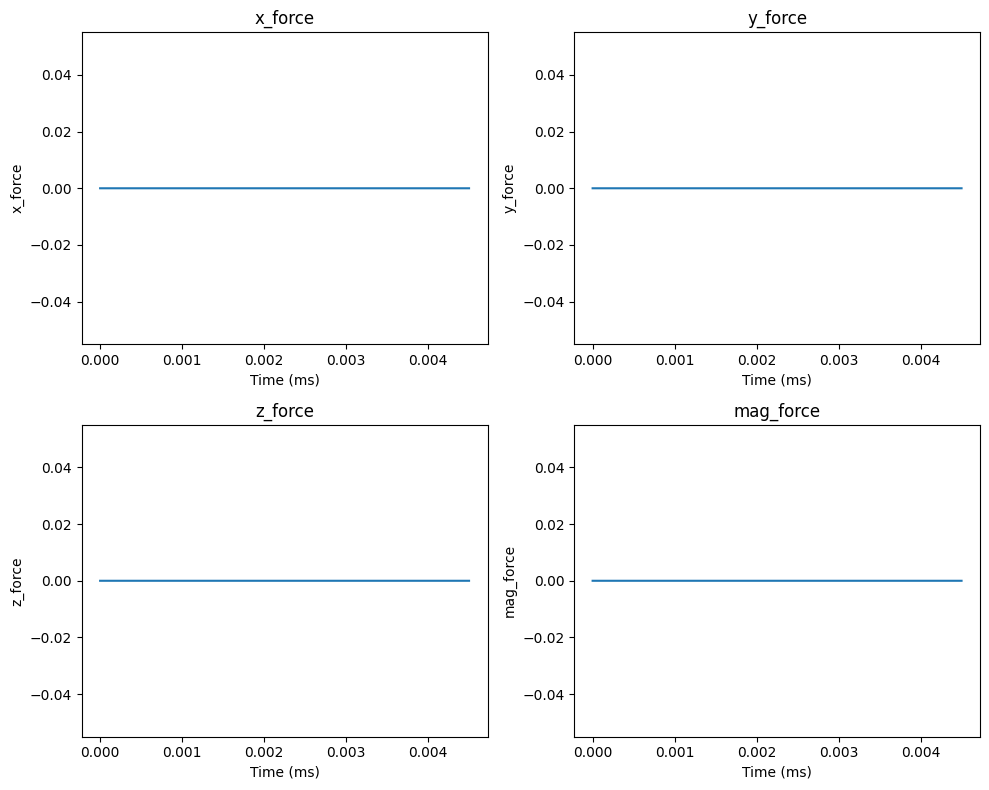

In [37]:
y_keys = ['x_force', 'y_force', 'z_force', 'mag_force']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through the axes and y_keys to create the subplots
for ax, y_key in zip(axes.flatten(), y_keys):
    ax.plot(result['t'], result[y_key])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel(y_key)
    ax.set_title(f'{y_key}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
